# **Heart Disease Project**

## Meta Data 
### About Dataset
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`': [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
   
### Acknowledgements
#### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Importing Libraries

In [41]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
heart = pd.read_csv('heart_disease_uci.csv')
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## E.D.A

### Basic EDA

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
heart.shape

(920, 16)

In [6]:
heart['age'].min(), heart['age'].max()

(28, 77)

Age Mean:  53.51086956521739
Age Median:  54.0
Age Mode:  54


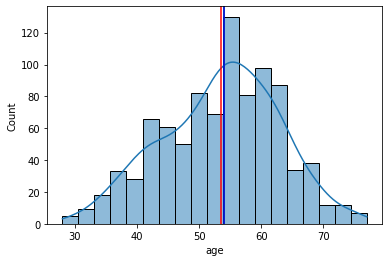

In [7]:
#Distribution of Age
sns.histplot(heart['age'], kde=True)
plt.axvline(heart['age'].mean(), color='r')
plt.axvline(heart['age'].median(), color='g')
plt.axvline(heart['age'].mode()[0], color='b')

print('Age Mean: ', heart['age'].mean())
print('Age Median: ', heart['age'].median())
print('Age Mode: ', heart['age'].mode()[0])

In [8]:
#plot the histogram of age column and coloring this by sex 

fig = px.histogram(heart, x='age', color='sex')
fig.show()

In [9]:
#find the value of sex column

heart['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [10]:
#calculate the percentages of male and female Value 

male_count = 726
female_count = 194
total_count = male_count + female_count
male_percent = (male_count / total_count) * 100
female_percent = (female_count / total_count) * 100
print(f'Male Percentage in dataset: {male_percent:.2f}%')
print(f'Female Percentage in dataset: {female_percent:.2f}%')

Male Percentage in dataset: 78.91%
Female Percentage in dataset: 21.09%


In [11]:
#Find the value count of age column grouping by sex 

heart['age'].groupby(heart['sex']).value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: age, Length: 91, dtype: int64

In [12]:
#Lets deal with dataset column 

heart['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: dataset, dtype: int64


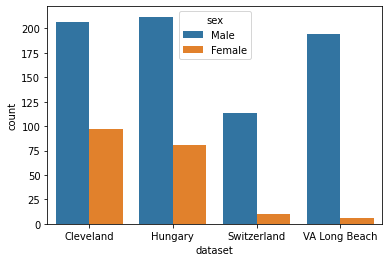

In [13]:
#plot datset column
sns.countplot(heart['dataset'], hue=heart['sex'])

# plot = px.bar(heart, x='dataset', color='sex')
# plot.show()

print(heart.groupby('sex')['dataset'].value_counts())

In [14]:
#make a plot of age by dataset coumn

fig = px.histogram(heart, x='age', color='dataset')
fig.show()

#print the mean mdeian and mode of age column grouped by dataset column 

print(f"Mean of Dataset: {heart['age'].groupby(heart['dataset']).mean()}")
print("---------------------------------")
print(f"Median of Dataset: {heart['age'].groupby(heart['dataset']).median()}")
print("---------------------------------")
print(f"Mode of Dataset: {heart['age'].groupby(heart['dataset']).agg(pd.Series.mode)}")

Mean of Dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
---------------------------------
Median of Dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
---------------------------------
Mode of Dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [15]:
#Lets explore CP column 

heart['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

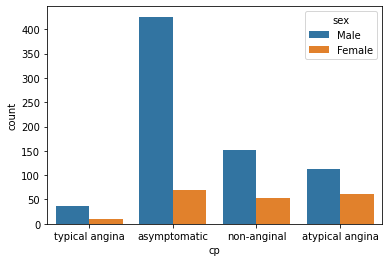

In [16]:
# Count plot of cp column by sex column 

sns.countplot(heart['cp'], hue=heart['sex'])

In [17]:
#plot the CP column

fig = px.histogram(heart, x='age', color='cp')
fig.show()

<AxesSubplot:xlabel='cp', ylabel='count'>

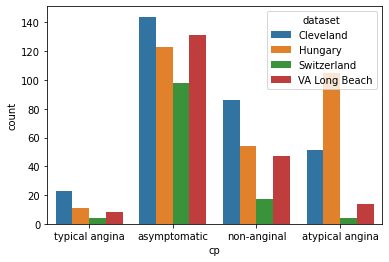

In [18]:
#Count pliot of cp column by dataset column 

sns.countplot(heart['cp'], hue=heart['dataset'])

In [19]:
#Value counts of cp column group by dataset column 

heart['cp'].groupby(heart['dataset']).value_counts()

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: cp, dtype: int64

In [20]:
# Lets explore the trestbps column

heart['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

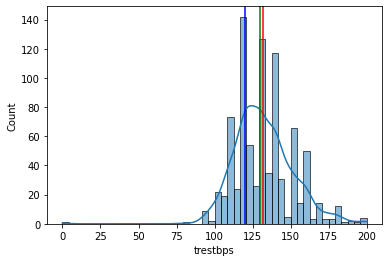

In [21]:
#create a hisplot of trestbps column 

sns.histplot(heart['trestbps'], kde=True)
plt.axvline(heart['trestbps'].mean(), color='r')
plt.axvline(heart['trestbps'].median(), color='g')
plt.axvline(heart['trestbps'].mode()[0], color='b')

### Imputing Missing Values Using ML Models

In [22]:
# The percentage of missing values in trestbps column
f"Precentage of missing values in trestbps column: {heart['trestbps'].isna().sum() / len(heart) * 100:.2f}%"


'Precentage of missing values in trestbps column: 6.41%'

In [23]:
#impute the missing values of trestbps column using iterative imputer
#Create an object of interative imputer 

# imputer_1 = IterativeImputer(max_iter=10, random_state=42)
# heart['trestbps'] = imputer_1.fit_transform(heart[['trestbps']])

# #print missing values in trestbps column
# f"Precentage of missing values in trestbps column: {heart['trestbps'].isna().sum() / len(heart) * 100:.2f}%"

In [24]:
#impute the missing values for ca, oldpeak, thal, chol columns using iterative imputer

# imputer_2 = IterativeImputer(max_iter=10, random_state=42)
# heart[['ca']] = imputer_2.fit_transform(heart[['ca']])
# heart['oldpeak'] = imputer_2.fit_transform(heart[['oldpeak']])
# heart['chol'] = imputer_2.fit_transform(heart[['chol']])
# heart['thalch'] = imputer_2.fit_transform(heart[['thalch']])

In [25]:
heart.isnull().sum()[heart.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = heart.isnull().sum()[heart.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [26]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [27]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = heart[heart[passed_col].isnull()]
    df_not_null = heart[heart[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = heart[heart[passed_col].isnull()]
    df_not_null = heart[heart[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [28]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((heart[col].isnull().sum() / len(heart)) * 100, 2))+"%")
    if col in categorical_cols:
        heart[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        heart[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
Missing Values chol : 3.26%
Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [29]:
#Lets impute other column with missing values 
(heart.isnull().sum() / len(heart) * 100).sort_values(ascending=False)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

### Outlier Detection 

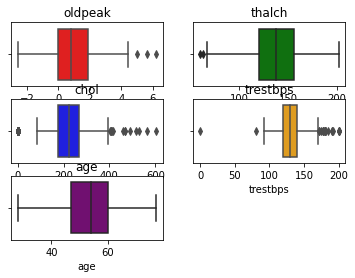

In [37]:
# Boxplot of all numeric columns subplots whith different colors for each subplot in the dataset
colors = ['red', 'green', 'blue','orange', 'purple']

for i , col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=col, data=heart, color=colors[i])
    plt.title(col)
    
plt.show()


### Results of EDA  
1. The minimum heart disease starts from `28` yrs old.
2. Most of the people get heart disease at age `53-54` yrs.
3. Most of the males and females get heart disease at gae of `54-55`
4. Male Percentage in dataset: `78.91%`
5. Female Percentage in dataset: `21.09%`
6. We have highest patients from cleveland `304` and lowest from Switzerland `123`    
    1. The highest number of females in this dataset are from cleveland `97` and lowest from VA Long Beach `6`
    2. The highest number of males in this dataset are from Hungary `212` and lowest from Switzerland `113`
7. Most males and femnales have asymptomatic chest pain 
8. Age 54-55 is the age where most patients have chest pain.
9. Chest pains by country
    1. Cleveland
       1. Highest is asymptomatic cp: `144`
       2. Lowest is typical angina  cp: `23`
    2. Hungary
       1.  Highest is asymptomatic cp: `123`
       2.  Lowest is typical angina  cp: `11`
    3. Switzerland
       1. Highest is asymptomatic cp: `98`
       2. Lowest is typical angina  cp: `4`
    4. VA Long Beach
       1. Highest is asymptomatic cp: `131`
       2. Lowest is typical angina  cp: `8`
 10. There are other supporting column as well whch helpus determine chest pain and consequently heart disease (we will not dive deeper into these column).
 11. It was found that several columns had missing values which was resolved by imputing missing values through machine learning models. 
 12. Numeric columns have several outliers but due to the source of the dataset the outliers are also True values, hence they are not removed. 


## Machine Learning 

#### Overview
The target column is `num` as its a predicted column. It has value:`[0, 1, 2, 3, 4]`. For better understanding purposes;

`***0 = No Heart Disease***`

`***1 = Minute Heart Disease***`

`***2 = Moderate Heart Disease***`

`***3 = Severe Heart Disease***`

`***4 = Critical Heart Disease*** `

We will use multiple classifiers for multi-class classfiiation 

1. Logistic regression 
2. KNN
3. NB
4. SVM
5. Decision Tree 
6. Random Forest
7. XGBoost
8. GardientBoost
9. AdaBoost
10. LightGBM

In [38]:
#Split the data into X and Y
X = heart.drop('num', axis=1)
y = heart['num']

#encode X data using seperate label encoder for all categorical columns and save it for inverse transform
LabelEncoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = LabelEncoder.fit_transform(X[col])
    else:
        pass

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LGBM', LGBMClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.6806398234969663
Test Accuracy: 0.6413043478260869

Model: Gradient Boosting
Cross-validation Accuracy: 0.641257584114727
Test Accuracy: 0.6684782608695652

Model: Support Vector Machine
Cross-validation Accuracy: 0.5977937120794264
Test Accuracy: 0.5597826086956522

Model: Logistic Regression
Cross-validation Accuracy: 0.5149200220628792
Test Accuracy: 0.4945652173913043

Model: KNN
Cross-validation Accuracy: 0.5950818165103879
Test Accuracy: 0.5380434782608695

Model: Decision Tree
Cross-validation Accuracy: 0.6086229086229087
Test Accuracy: 0.6358695652173914

Model: XGBoost
Cross-validation Accuracy: 0.6751792608935465
Test Accuracy: 0.6521739130434783

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number 